In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import seaborn as sns
import json

In [2]:
df = pd.read_pickle('data/txDF.pkl',compression='gzip')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Country,Visibility(mi),Weather_Condition,Precipitation(in),Sunrise_Sunset,Civil_Twilight
261007,A-261009,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,Austin,Travis,TX,78731,US,10.0,Clear,NaN,Day,Day
261008,A-261010,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,Austin,Travis,TX,78752-2826,US,10.0,Clear,NaN,Day,Day
261009,A-261011,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,Austin,Travis,TX,78752,US,10.0,Clear,NaN,Day,Day
261010,A-261012,2,2016-11-30 16:06:49,2016-11-30 17:27:00,32.856014,-97.513084,Fort Worth,Tarrant,TX,76135,US,NaN,NaN,NaN,Day,Day
261011,A-261013,3,2016-11-30 16:35:01,2016-11-30 17:49:39,32.797668,-97.212090,Fort Worth,Tarrant,TX,76118,US,NaN,NaN,NaN,Day,Day


In [3]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Visibility(mi)',
       'Weather_Condition', 'Precipitation(in)', 'Sunrise_Sunset',
       'Civil_Twilight'],
      dtype='object')

In [4]:
columns_of_interest=['ID','Severity','Start_Time','End_Time','Start_Lat', 'Start_Lng', 'City', 'County', 'State',
       'Zipcode', 'Country','Visibility(mi)', 'Weather_Condition','Precipitation(in)','Sunrise_Sunset','Civil_Twilight']
condition=df['State'] =='TX'
txDF=df[condition][columns_of_interest]

txDF.head()

txDF['City'].value_counts()

Houston        93245
Austin         58553
Dallas         57823
San Antonio    21613
El Paso         9352
               ...  
Maxwell            1
Tilden             1
Driftwood          1
Cuero              1
Yorktown           1
Name: City, Length: 713, dtype: int64

In [5]:
txDF['Weather_Condition'].value_counts()

Clear                                  76753
Mostly Cloudy                          47948
Overcast                               45135
Partly Cloudy                          37059
Scattered Clouds                       25356
                                       ...  
Light Snow / Windy                         2
Wintry Mix                                 2
Thunder and Hail / Windy                   1
Thunderstorms and Snow                     1
Heavy Thunderstorms with Small Hail        1
Name: Weather_Condition, Length: 65, dtype: int64

In [6]:
txDF.count()

ID                   298062
Severity             298062
Start_Time           298062
End_Time             298062
Start_Lat            298062
Start_Lng            298062
City                 298062
County               298062
State                298062
Zipcode              298062
Country              298062
Visibility(mi)       291444
Weather_Condition    291299
Precipitation(in)     77915
Sunrise_Sunset       298062
Civil_Twilight       298062
dtype: int64

In [7]:
#get total accidents across TX
tx_total_accidents=len(txDF['ID'].value_counts())
tx_total_accidents


298062

In [8]:
#group txDF by Weather_Condition
tx_grouped_weather = txDF.groupby('Weather_Condition')
#total counts of accidents occurring across various weather conditions
tx_total_by_group = tx_grouped_weather.nunique()['ID']
tx_total_by_group.head(15)
#total counts of accidents occurring across various weather conditions
#percent of accidents occurring across various weather conditions
#tx_percent_by_group = tx_total_by_group/tx_total_accidents
#tx_percent_by_group.head(15)
#create df of total and % accidents occurring across various weather conditions
tx_weather_conditionDF = pd.DataFrame({"Total Count": tx_total_by_group})
tx_weather_conditionDF

,Total Count
Weather_Condition,
Blowing Dust,3
Blowing Dust / Windy,28
Clear,76753
Cloudy,9163
Cloudy / Windy,219
...,...
Thunderstorm,586
Thunderstorms and Rain,395
Thunderstorms and Snow,1


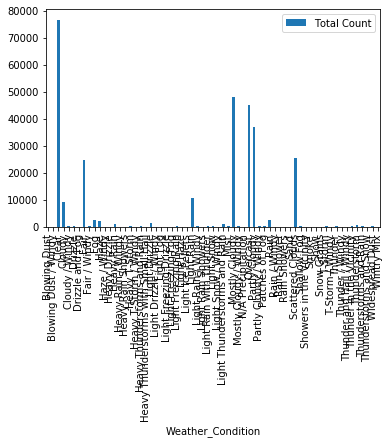

In [9]:
tx_weather_conditionDF.plot(kind="bar")

In [10]:
#create df for total counts of accidents during day and night 
tx_grouped_sun_set = txDF.groupby('Sunrise_Sunset')
#total counts of accidents occurring across various weather conditions
tx_total_sun_set = tx_grouped_sun_set.nunique()['ID']
tx_total_sun_set.head(15)
#total counts of accidents occurring across various weather conditions
#percent of accidents occurring across various weather conditions
#tx_percent_by_group = tx_total_by_group/tx_total_accidents
#tx_percent_by_group.head(15)
#create df of total and % accidents occurring across various weather conditions
tx_sun_setDF = pd.DataFrame({"Total Count": tx_total_sun_set})
tx_sun_setDF

,Total Count
Sunrise_Sunset,
Day,230645
Night,67417


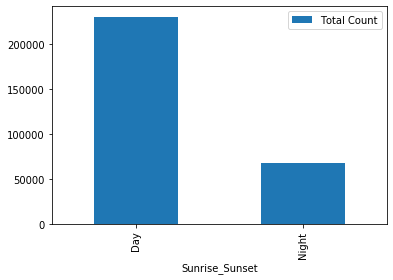

In [11]:
tx_sun_setDF.plot(kind="bar")

In [12]:
txDF['City'].value_counts()

Houston        93245
Austin         58553
Dallas         57823
San Antonio    21613
El Paso         9352
               ...  
Maxwell            1
Tilden             1
Driftwood          1
Cuero              1
Yorktown           1
Name: City, Length: 713, dtype: int64

In [13]:
#create df for total counts of accidents across cities 
tx_grouped_city = txDF.groupby('City')
#total counts of accidents occurring across various weather conditions
tx_total_city = tx_grouped_city.nunique()['ID']
tx_total_city.head(15)
#total counts of accidents occurring across various weather conditions
#percent of accidents occurring across cities in tx
tx_percent_city = tx_total_city/tx_total_accidents
tx_percent_city.head(15)
#create df of total and % accidents occurring across various weather conditions
tx_citiesDF = pd.DataFrame({"Total Count": tx_total_city,
                        "% of Accidents": tx_percent_city})
tx_citiesDF.head()

,Total Count,% of Accidents
City,,
Abbott,30,0.000101
Abernathy,3,0.000010
Abilene,41,0.000138
Addison,32,0.000107
Adkins,8,0.000027


In [14]:
tx_citiesDF.mean()

Total Count       418.039271
% of Accidents      0.001403
dtype: float64

In [15]:
tx_citiesDF.median()

Total Count       5.000000
% of Accidents    0.000017
dtype: float64

In [16]:
txDF.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Country,Visibility(mi),Weather_Condition,Precipitation(in),Sunrise_Sunset,Civil_Twilight
261007,A-261009,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,Austin,Travis,TX,78731,US,1.000000e+01,Clear,-9.223372e+18,Day,Day
261008,A-261010,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,Austin,Travis,TX,78752-2826,US,1.000000e+01,Clear,-9.223372e+18,Day,Day
261009,A-261011,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,Austin,Travis,TX,78752,US,1.000000e+01,Clear,-9.223372e+18,Day,Day
261010,A-261012,2,2016-11-30 16:06:49,2016-11-30 17:27:00,32.856014,-97.513084,Fort Worth,Tarrant,TX,76135,US,-9.223372e+18,None,-9.223372e+18,Day,Day
261011,A-261013,3,2016-11-30 16:35:01,2016-11-30 17:49:39,32.797668,-97.212090,Fort Worth,Tarrant,TX,76118,US,-9.223372e+18,None,-9.223372e+18,Day,Day


In [17]:
#create df for selected cities 
tx_metro_cities =  ['Austin', 'Round Rock', 'Cedar Park',
                 'San Marcos', 'Georgetown', 'Pflugerville',
                 'Hutto', 'Buda', 'Kyle', 'Leander',
                 'Dallas', 'Fort Worth', 'Arlington', 
                 'Plano','Garland', 'Irving', 'McKinney', 
                 'Frisco','Denton','Richardson', 'Allen','El Paso',
                 'Houston', 'The Woodlands', 'Sugar Land',
                 'Baytown', 'Conroe','San Antonio', 'New Braunfels', 
                 'Schertz', 'Seguin']

tx_metro_cities_df = pd.DataFrame({"City": tx_metro_cities})
tx_metro_cities_df

,City
0,Austin
1,Round Rock
2,Cedar Park
3,San Marcos
4,Georgetown
5,Pflugerville
6,Hutto
7,Buda
8,Kyle
9,Leander


In [18]:
tx_clean_city = pd.merge(tx_metro_cities_df, txDF, on='City')

In [19]:
tx_clean_city.head()

,City,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,County,State,Zipcode,Country,Visibility(mi),Weather_Condition,Precipitation(in),Sunrise_Sunset,Civil_Twilight
0,Austin,A-261009,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,Travis,TX,78731,US,10.0,Clear,-9.223372e+18,Day,Day
1,Austin,A-261010,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,Travis,TX,78752-2826,US,10.0,Clear,-9.223372e+18,Day,Day
2,Austin,A-261011,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,Travis,TX,78752,US,10.0,Clear,-9.223372e+18,Day,Day
3,Austin,A-261028,2,2016-11-30 17:11:22,2016-11-30 17:41:09,30.332523,-97.686707,Travis,TX,78752,US,10.0,Clear,-9.223372e+18,Day,Day
4,Austin,A-261039,2,2016-11-30 17:16:42,2016-11-30 17:46:32,30.292852,-97.747017,Travis,TX,78705,US,10.0,Clear,-9.223372e+18,Day,Day


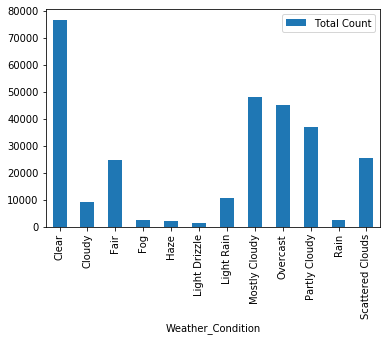

In [20]:
#gather only the weather conditions that have 1000+ accidents
tx_one_thousand=tx_weather_conditionDF.loc[(tx_weather_conditionDF["Total Count"]>1000)]
tx_one_thousand
tx_one_thousand.plot(kind="bar")

In [21]:
#create new dataframe form tx_clean_city that only includes: 
#weather condition catagories with 1000+ accidents
tx_cleaned_data = pd.merge(tx_clean_city, tx_one_thousand, on='Weather_Condition')
tx_cleaned_data.head()

,City,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,County,State,Zipcode,Country,Visibility(mi),Weather_Condition,Precipitation(in),Sunrise_Sunset,Civil_Twilight,Total Count
0,Austin,A-261009,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,Travis,TX,78731,US,10.0,Clear,-9.223372e+18,Day,Day,76753
1,Austin,A-261010,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,Travis,TX,78752-2826,US,10.0,Clear,-9.223372e+18,Day,Day,76753
2,Austin,A-261011,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,Travis,TX,78752,US,10.0,Clear,-9.223372e+18,Day,Day,76753
3,Austin,A-261028,2,2016-11-30 17:11:22,2016-11-30 17:41:09,30.332523,-97.686707,Travis,TX,78752,US,10.0,Clear,-9.223372e+18,Day,Day,76753
4,Austin,A-261039,2,2016-11-30 17:16:42,2016-11-30 17:46:32,30.292852,-97.747017,Travis,TX,78705,US,10.0,Clear,-9.223372e+18,Day,Day,76753


In [22]:
condition_city = txDF['City'] == 'Austin'
austinDF=txDF[condition_city][columns_of_interest]
austinDF.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Country,Visibility(mi),Weather_Condition,Precipitation(in),Sunrise_Sunset,Civil_Twilight
261007,A-261009,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,Austin,Travis,TX,78731,US,10.0,Clear,-9.223372e+18,Day,Day
261008,A-261010,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,Austin,Travis,TX,78752-2826,US,10.0,Clear,-9.223372e+18,Day,Day
261009,A-261011,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,Austin,Travis,TX,78752,US,10.0,Clear,-9.223372e+18,Day,Day
261026,A-261028,2,2016-11-30 17:11:22,2016-11-30 17:41:09,30.332523,-97.686707,Austin,Travis,TX,78752,US,10.0,Clear,-9.223372e+18,Day,Day
261037,A-261039,2,2016-11-30 17:16:42,2016-11-30 17:46:32,30.292852,-97.747017,Austin,Travis,TX,78705,US,10.0,Clear,-9.223372e+18,Day,Day


In [23]:
austinDF["Combined_Weather"] = austinDF["Weather_Condition"]
austinDF.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Country,Visibility(mi),Weather_Condition,Precipitation(in),Sunrise_Sunset,Civil_Twilight,Combined_Weather
261007,A-261009,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,Austin,Travis,TX,78731,US,10.0,Clear,-9.223372e+18,Day,Day,Clear
261008,A-261010,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,Austin,Travis,TX,78752-2826,US,10.0,Clear,-9.223372e+18,Day,Day,Clear
261009,A-261011,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,Austin,Travis,TX,78752,US,10.0,Clear,-9.223372e+18,Day,Day,Clear
261026,A-261028,2,2016-11-30 17:11:22,2016-11-30 17:41:09,30.332523,-97.686707,Austin,Travis,TX,78752,US,10.0,Clear,-9.223372e+18,Day,Day,Clear
261037,A-261039,2,2016-11-30 17:16:42,2016-11-30 17:46:32,30.292852,-97.747017,Austin,Travis,TX,78705,US,10.0,Clear,-9.223372e+18,Day,Day,Clear


In [24]:
austinDF['Combined_Weather'] = austinDF['Combined_Weather'].replace(
    {'Cloudy': 'Clear',
     'Cloudy / Windy': 'Clear',
     'Fair': 'Clear',
     'Fair / Windy': 'Clear',
     'Mostly Cloudy': 'Clear',
     'Mostly Cloudy / Clear': 'Clear',
     'Mostly Cloudy / Windy': 'Clear',
     'Overcast': 'Clear',
     'Partly Cloudy': 'Clear',
     'Partly Cloudy / Windy': 'Clear',
     'Scattered Clouds': 'Clear',
     
     'Blowing Dust': 'Dust / Sand / Smoke',
     'Blowing Dust / Windy': 'Dust / Sand / Smoke',
     'Sand': 'Dust / Sand / Smoke',
     'Smoke': 'Dust / Sand / Smoke',
     'Widespread Dust': 'Dust / Sand / Smoke',

     'Fog': 'Fog / Haze / Mist',
     'Haze': 'Fog / Haze / Mist',
     'Haze / Windy': 'Fog / Haze / Mist',
     'Light Fog': 'Fog / Haze / Mist',
     'Light Freezing Fog': 'Fog / Haze / Mist',
     'Light Haze': 'Fog / Haze / Mist',
     'Mist': 'Fog / Haze / Mist',
     'Patches of Fog': 'Fog / Haze / Mist',
     'Shallow Fog': 'Fog / Haze / Mist',
     
     'Drizzle': 'Drizzle',
     'Drizzle and Fog': 'Drizzle',
     'Heavy Drizzle': 'Drizzle',
     'Light Drizzle': 'Drizzle',
     'Light Drizzle / Windy': 'Drizzle',
     'Light Freezing Drizzle': 'Drizzle',

     'Light Freezing Rain': 'Light Rain',
     'Light Rain': 'Light Rain',
     'Light Rain / Windy': 'Light Rain',
     'Rain': 'Light Rain',
     'Rain / Windy': 'Light Rain',
     
     'Rain Shower': 'Light Precipitation',
     'Rain Showers': 'Light Precipitation',
     'Showers in the Vicinity': 'Light Precipitation',

     'Heavy Rain': 'Heavy Rain',
     'Heavy Rain / Windy': 'Heavy Rain',
     'Heavy Rain Showers': 'Heavy Rain',
     
     'Light Ice Pellets': 'Snow',
     'Light Snow': 'Snow',
     'Snow Grains': 'Snow',
     'Snow': 'Snow',
     
     'Heavy T-Storm': 'Extreme Weather',
     'Heavy Thunderstorms and Rain': 'Extreme Weather',
     'Heavy Thunderstorms and Small Hail': 'Extreme Weather',
     'Light Rain with Thunder': 'Extreme Weather',
     'Light Thunderstorms and Rain': 'Extreme Weather',
     'T-Storm': 'Extreme Weather',
     'T-Storm / Windy': 'Extreme Weather',
     'Thunder': 'Extreme Weather',
     'Thunder / Windy': 'Extreme Weather',
     'Thunder in the Vicinity': 'Extreme Weather',
     'Thunder and Hail / Windy': 'Extreme Weather',
     'Thunderstorm': 'Extreme Weather',
     'Thunderstorms': 'Extreme Weather',
     'Thunderstorms and Rain': 'Extreme Weather',
     'Thunderstorms and Snow': 'Extreme Weather',
     'Wintry Mix': 'Extreme Weather',
    })

In [25]:
austinDF["Combined_Weather"].value_counts()

Clear                  53211
Light Rain              2880
Fog / Haze / Mist        878
Extreme Weather          537
Heavy Rain               193
Drizzle                  180
Snow                      55
Dust / Sand / Smoke       14
Name: Combined_Weather, dtype: int64

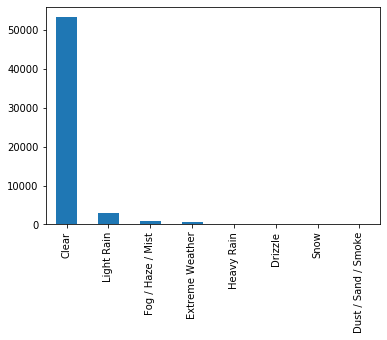

In [26]:
austinDF['Combined_Weather'].value_counts().plot(kind='bar')